# COVID-19 Data Analysis and Visualization 🦠💠📊📈

## Import modules 📔📚

In [1]:
!python -m pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


## 📂 Create Dataset

In [2]:
# to make dataset
# run the file data_generate.py
!python data_generate.py

Dataset 'covid19_global_data.csv' generated with 18178 records.
Data generation process completed.


## 📌 Main Tasks

### 🔹 Data Preparation

In [3]:
df = pd.read_csv("covid19_global_data.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Record_ID,Country,State_Region,Date,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Vaccination_Rate,Hospitalization_Rate,ICU_Cases
0,COVID_002720,Mexico,Veracruz,2020-11-16,482.0,69.0,301.0,112.0,1965.0,71.6,10.4,1.0
1,COVID_016750,India,Tamil Nadu,2021-12-01,518.0,34.0,313.0,171.0,2000.0,47.6,10.6,2.0
2,COVID_010704,India,Delhi,2022-12-17,460.0,25.0,332.0,103.0,2049.0,42.2,15.7,2.0
3,COVID_002666,Spain,Valencia,2023-07-06,485.0,20.0,365.0,100.0,1921.0,61.3,13.7,1.0
4,COVID_005089,Australia,Western Australia,2020-01-09,522.0,17.0,421.0,84.0,1963.0,88.0,6.8,1.0


### 🔹 Data Cleaning

In [4]:
df.isna().sum()

Record_ID                 0
Country                   0
State_Region              0
Date                      0
Confirmed_Cases         301
Deaths                  279
Recovered               269
Active_Cases            314
Tests_Conducted         289
Vaccination_Rate        256
Hospitalization_Rate    257
ICU_Cases               278
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

Record_ID               0
Country                 0
State_Region            0
Date                    0
Confirmed_Cases         0
Deaths                  0
Recovered               0
Active_Cases            0
Tests_Conducted         0
Vaccination_Rate        0
Hospitalization_Rate    0
ICU_Cases               0
dtype: int64

In [6]:
if df.duplicated().sum() > 0:
    print(f"{df.duplicated().sum()} Duplicate rows found and will be removed.")
    df = df.drop_duplicates()
    print(f"Now there are {df.duplicated().sum()} duplicate rows after removal.")
else:
    print("No duplicate rows found.")

142 Duplicate rows found and will be removed.
Now there are 0 duplicate rows after removal.


### 🔹 Data Analysis

In [7]:
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

numeric_cols = ["Confirmed_Cases","Deaths","Recovered",
                "Active_Cases","Tests_Conducted",
                "Vaccination_Rate","Hospitalization_Rate","ICU_Cases"]
print("\nSummary Statistics:\n", df[numeric_cols].describe(include="all"))

missing_percent = (df.isna().sum() / len(df)) * 100
print("\nMissing Values (%):\n", missing_percent)

country_cases = df.groupby("Country")["Confirmed_Cases"].sum().sort_values(ascending=False)
print("\nTop 10 Countries by Confirmed Cases:\n", country_cases.head(10))

country_deaths = df.groupby("Country")["Deaths"].sum().sort_values(ascending=False)
print("\nTop 10 Countries by Deaths:\n", country_deaths.head(10))

country_vax = df.groupby("Country")["Vaccination_Rate"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Avg Vaccination Rate:\n", country_vax.head(10))

time_series = df.groupby("Date")[["Confirmed_Cases","Deaths","Recovered","Active_Cases"]].sum()
print("\nOverall Time Series (first 10 rows):\n", time_series.head(10))

# Daily growth rate (Confirmed Cases)
time_series["Daily_New_Cases"] = time_series["Confirmed_Cases"].diff()
print("\nDaily New Cases (first 10 rows):\n", time_series["Daily_New_Cases"].head(10))

corr_matrix = df[["Confirmed_Cases","Deaths","Recovered",
                  "Active_Cases","Tests_Conducted",
                  "Vaccination_Rate","Hospitalization_Rate","ICU_Cases"]].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

icu_by_country = df.groupby("Country")["ICU_Cases"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Avg ICU Cases:\n", icu_by_country.head(10))

hosp_rate = df.groupby("Country")["Hospitalization_Rate"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Avg Hospitalization Rate:\n", hosp_rate.head(10))

state_cases = df.groupby(["Country","State_Region"])["Confirmed_Cases"].sum().sort_values(ascending=False)
print("\nTop 10 States/Regions by Confirmed Cases:\n", state_cases.head(10))

df["Death_Rate"] = df["Deaths"] / df["Confirmed_Cases"].replace(0,np.nan)
df["Recovery_Rate"] = df["Recovered"] / df["Confirmed_Cases"].replace(0,np.nan)

print("\nGlobal Average Death Rate:", df["Death_Rate"].mean())
print("Global Average Recovery Rate:", df["Recovery_Rate"].mean())

Dataset Shape: (15793, 12)

Column Data Types:
 Record_ID                       object
Country                         object
State_Region                    object
Date                    datetime64[ns]
Confirmed_Cases                float64
Deaths                         float64
Recovered                      float64
Active_Cases                   float64
Tests_Conducted                float64
Vaccination_Rate               float64
Hospitalization_Rate           float64
ICU_Cases                      float64
dtype: object

Missing Values:
 Record_ID               0
Country                 0
State_Region            0
Date                    0
Confirmed_Cases         0
Deaths                  0
Recovered               0
Active_Cases            0
Tests_Conducted         0
Vaccination_Rate        0
Hospitalization_Rate    0
ICU_Cases               0
dtype: int64

Summary Statistics:
        Confirmed_Cases        Deaths     Recovered  Active_Cases  \
count     15793.000000  15793.000000 

### 🔹 Data Visualization

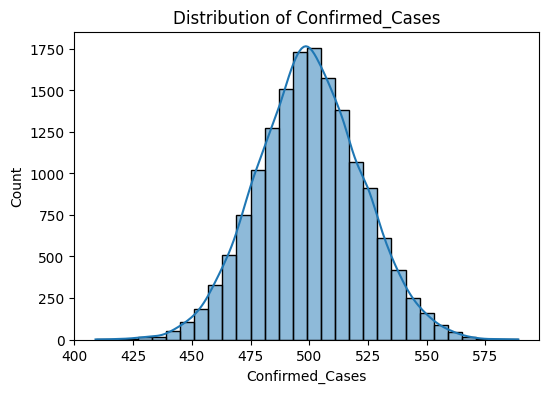

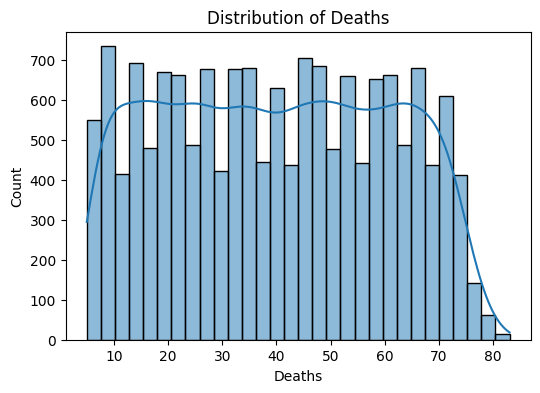

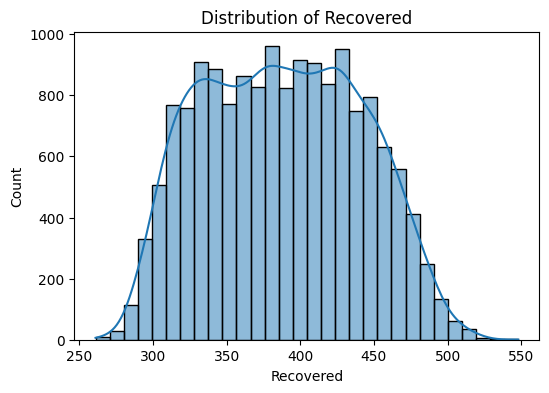

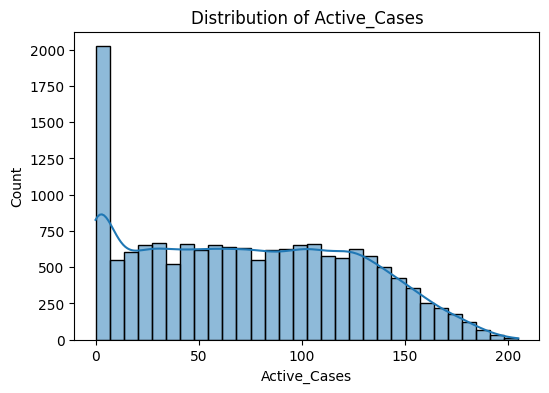

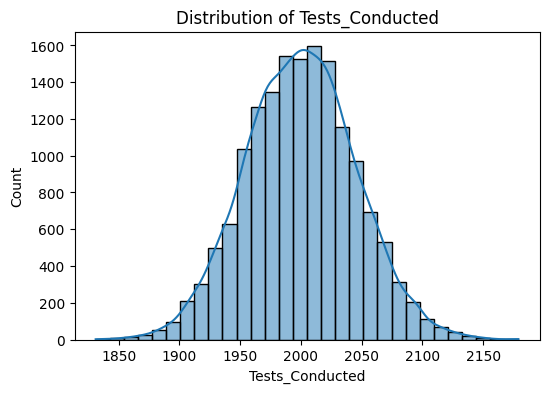

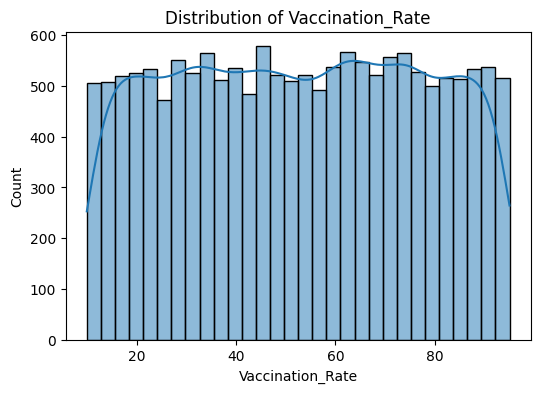

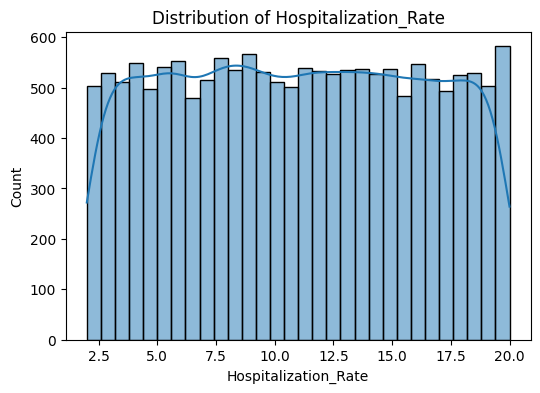

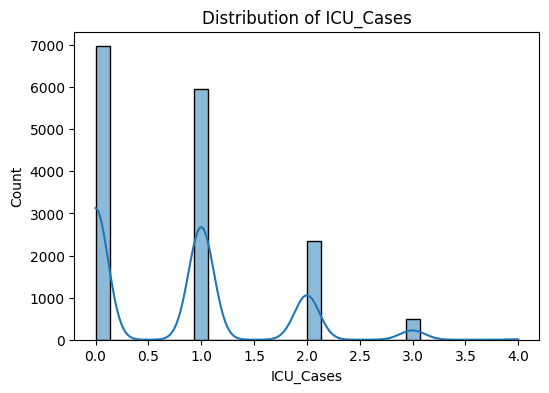

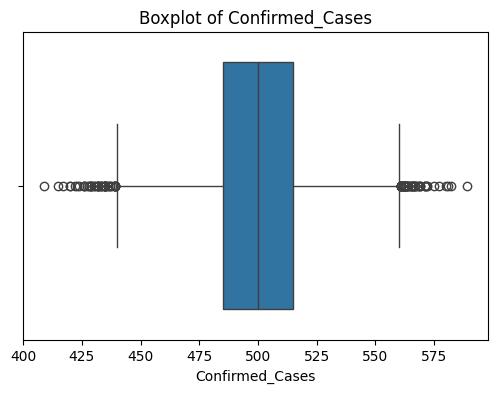

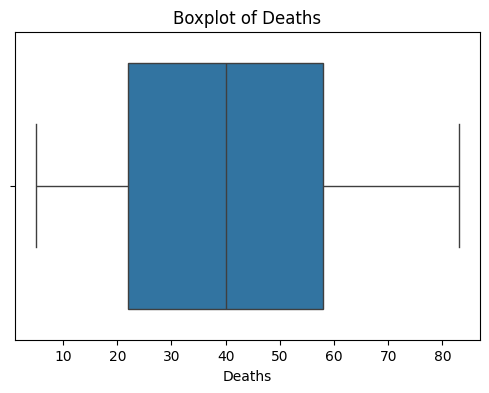

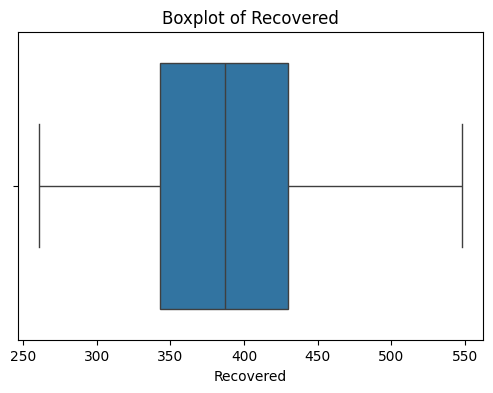

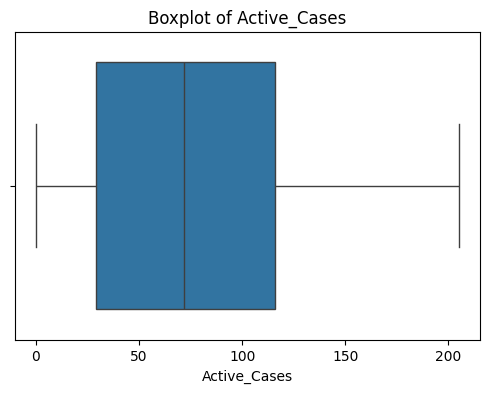

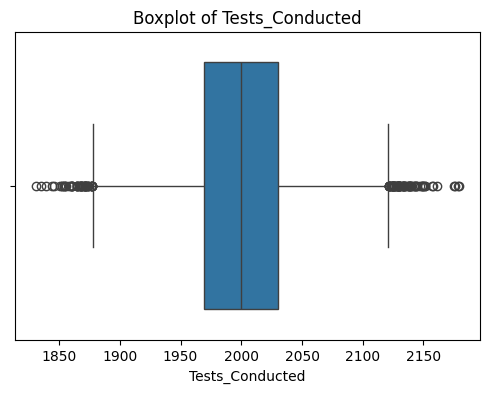

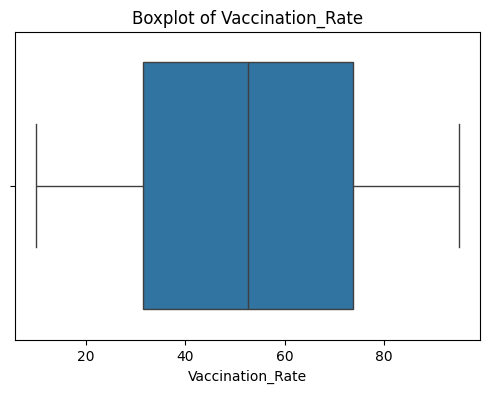

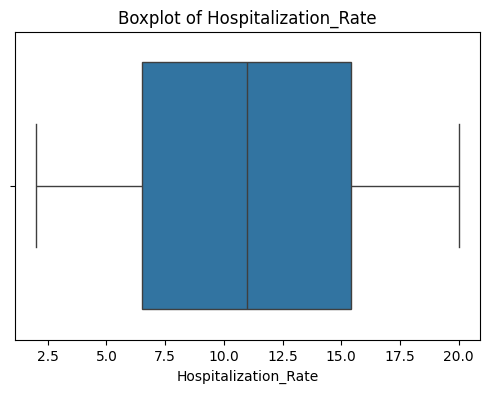

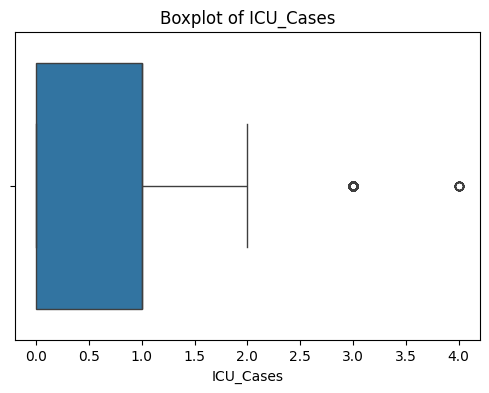

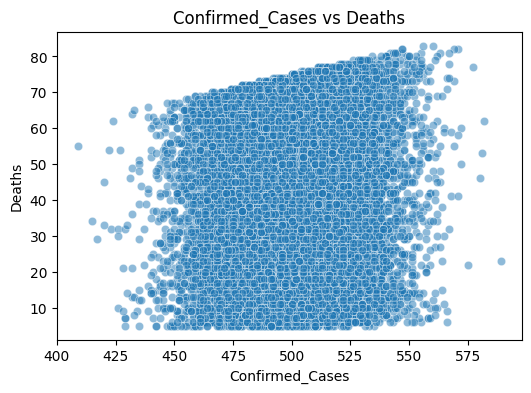

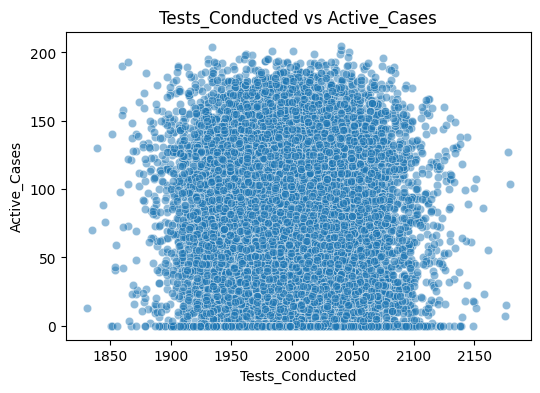

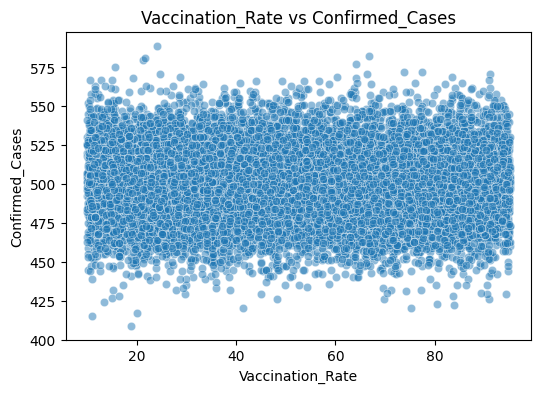

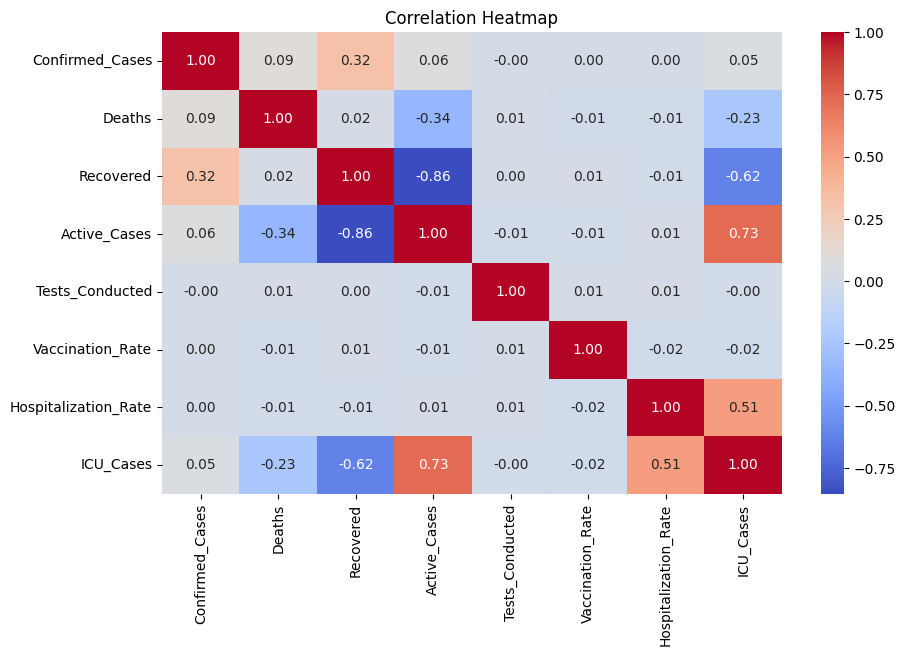

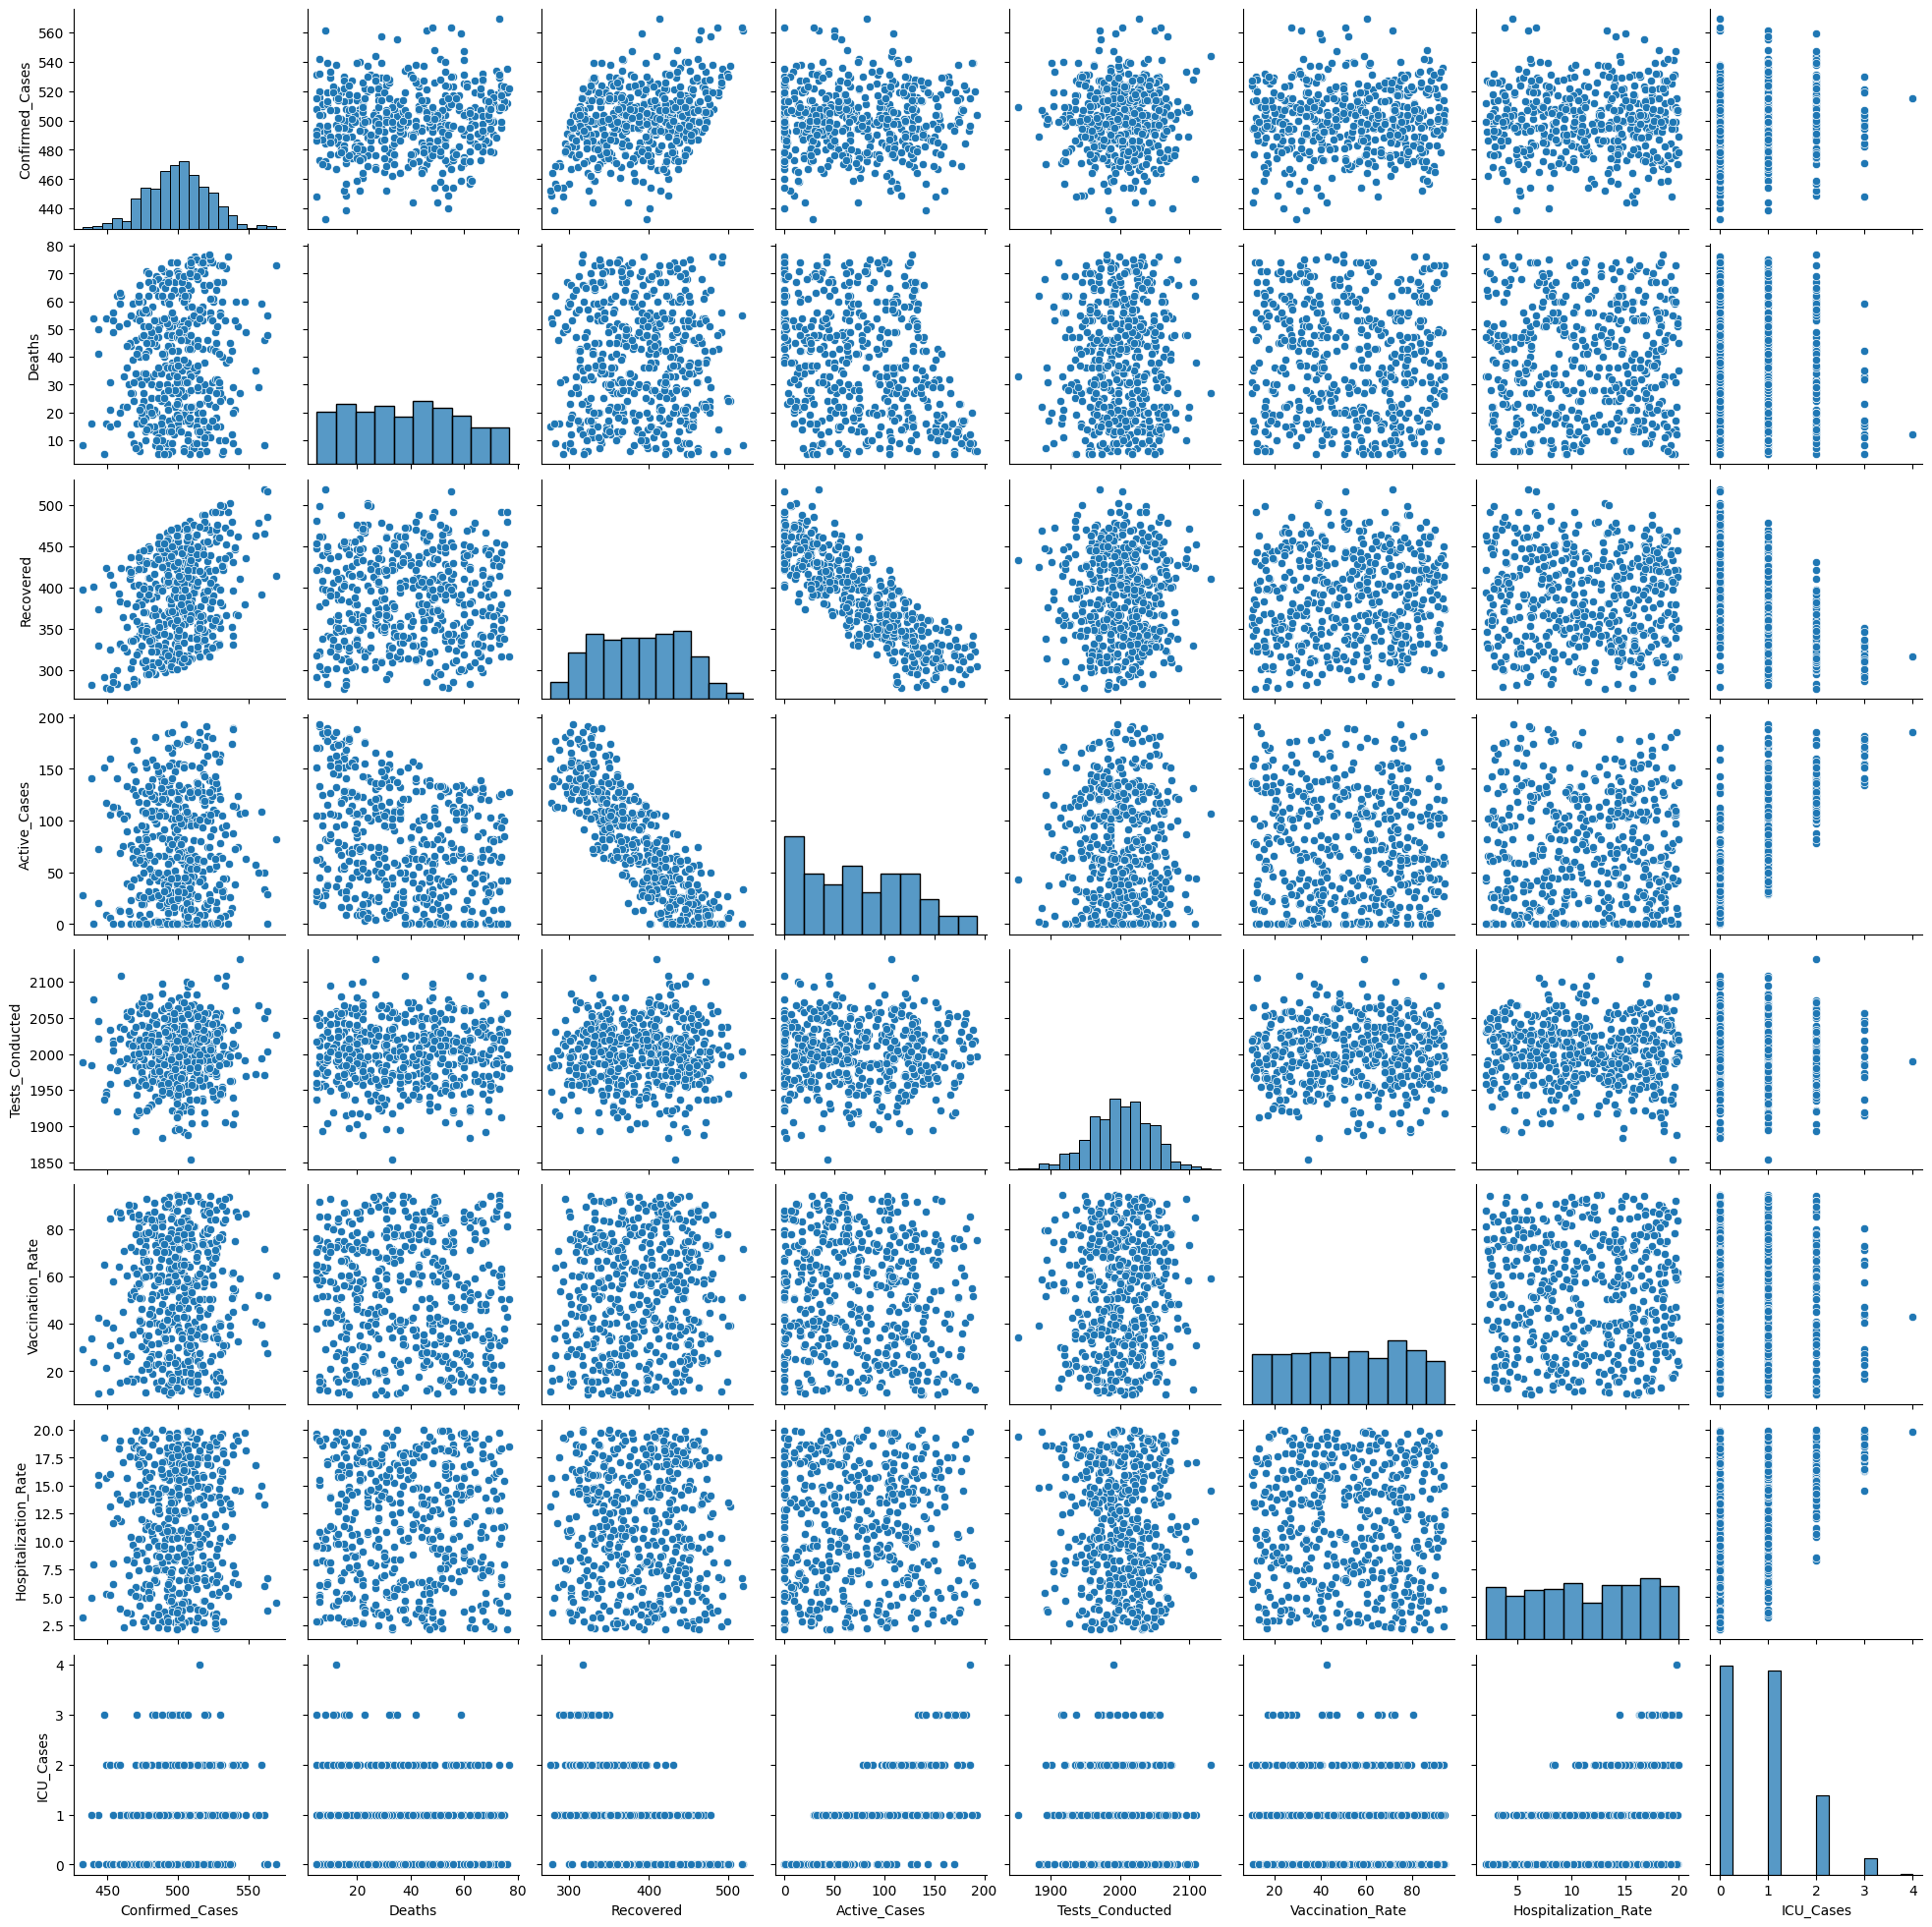

<Figure size 1200x600 with 0 Axes>

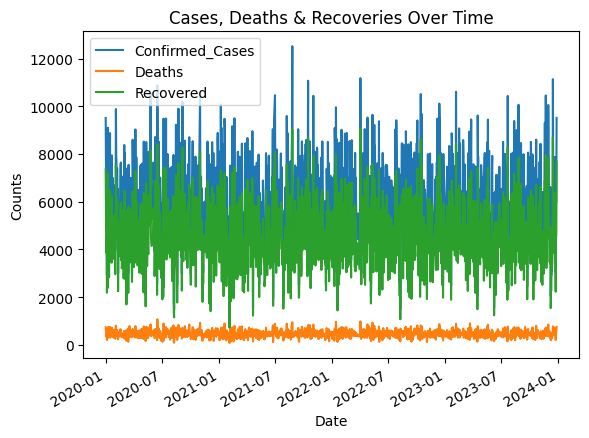

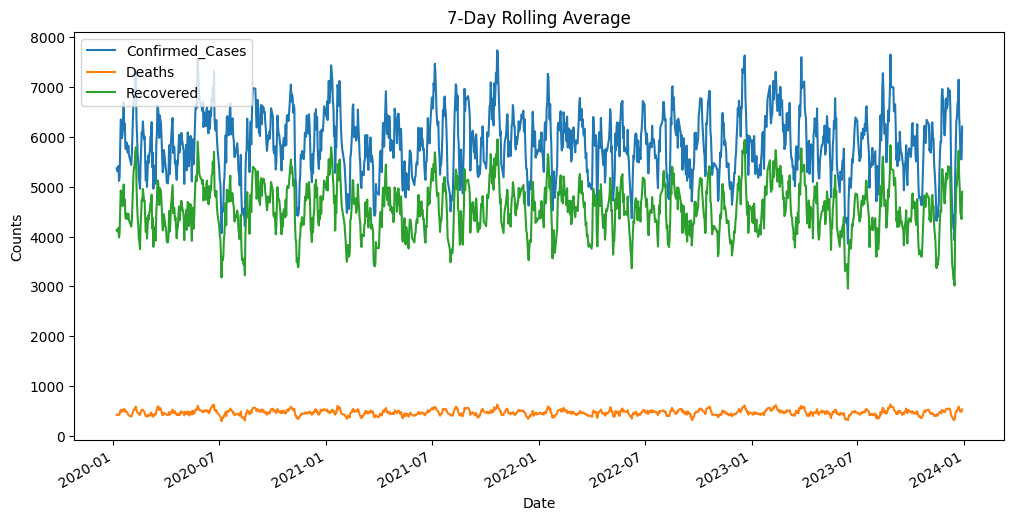

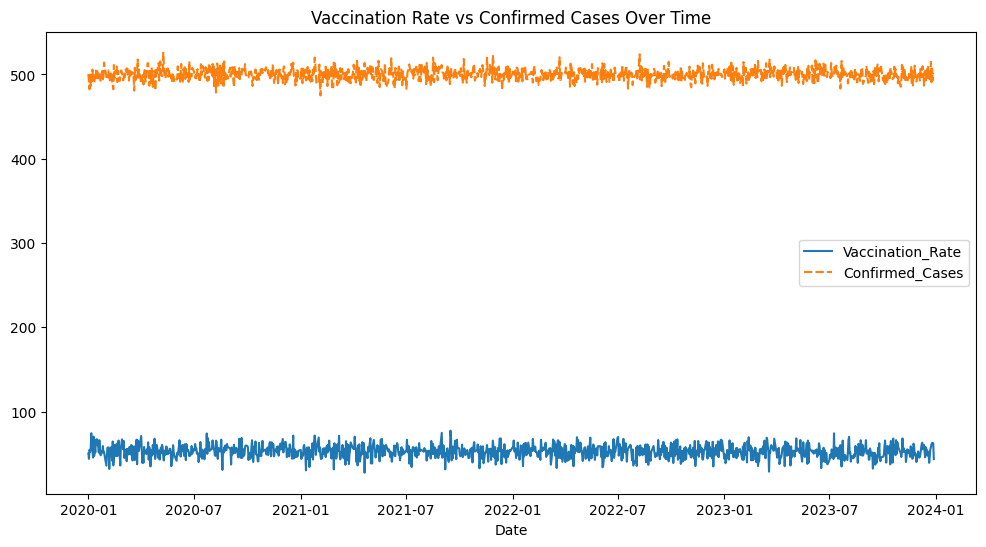

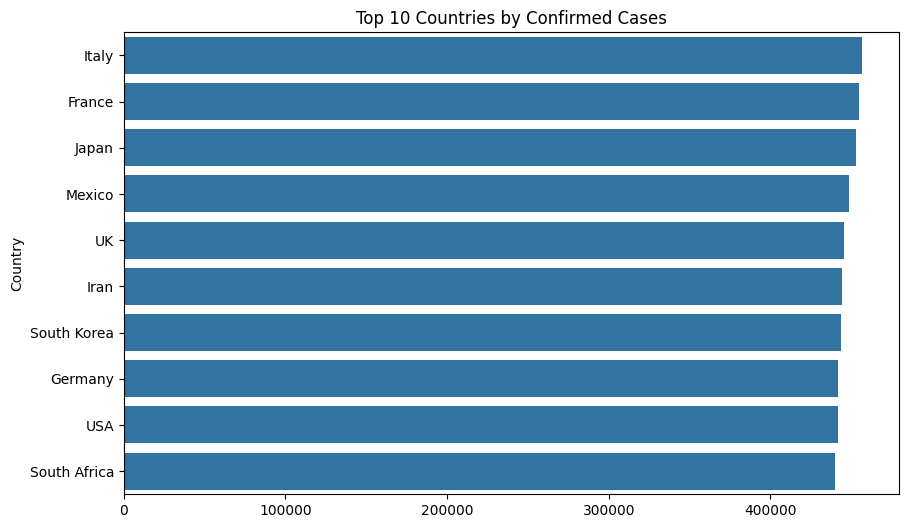

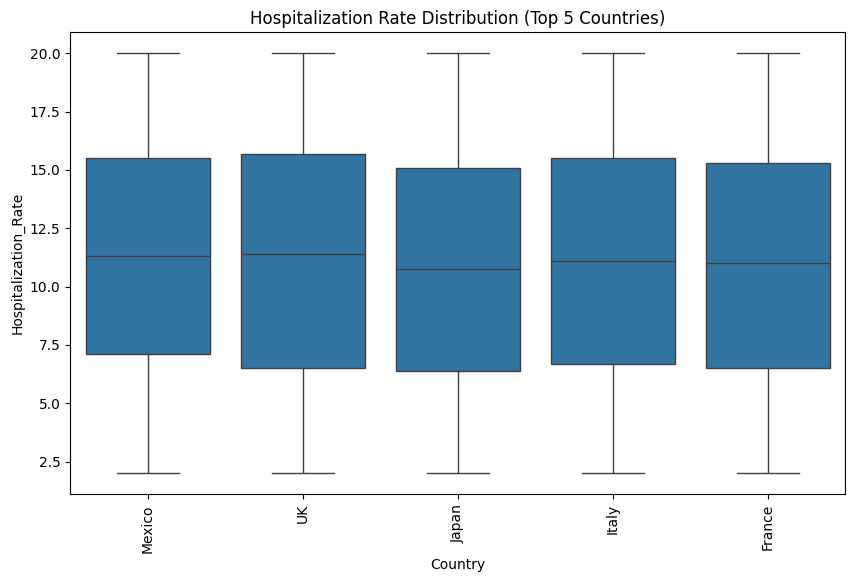

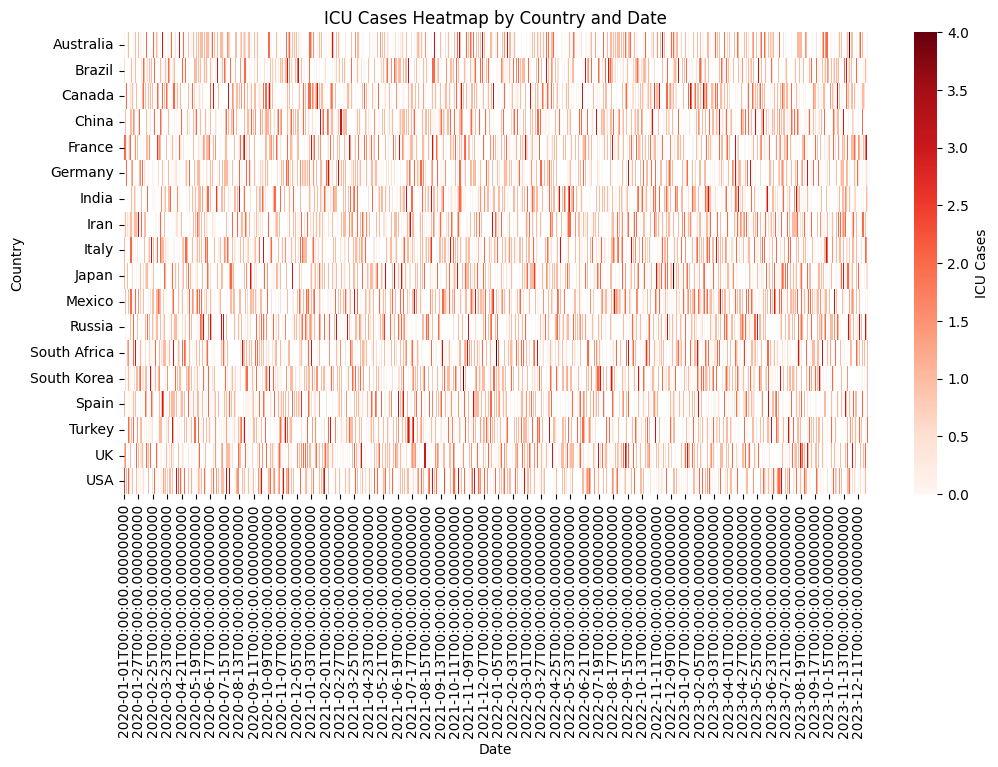

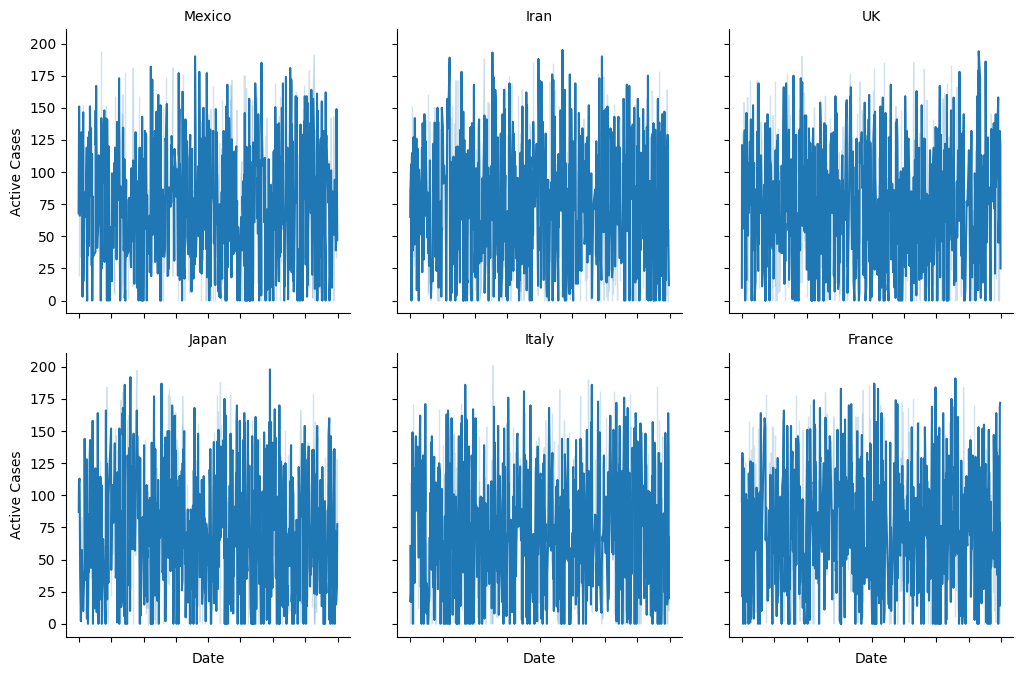

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

pairs = [("Confirmed_Cases","Deaths"),
         ("Tests_Conducted","Active_Cases"),
         ("Vaccination_Rate","Confirmed_Cases")]

for x,y in pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
    plt.title(f"{x} vs {y}")
    plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[numeric_cols].dropna().sample(500))  # sample for speed
plt.show()

time_group = df.groupby("Date")[["Confirmed_Cases","Deaths","Recovered"]].sum()

plt.figure(figsize=(12,6))
time_group.plot()
plt.title("Cases, Deaths & Recoveries Over Time")
plt.ylabel("Counts")
plt.show()

time_group_rolling = time_group.rolling(7).mean()
time_group_rolling.plot(figsize=(12,6))
plt.title("7-Day Rolling Average")
plt.ylabel("Counts")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby("Date")[["Vaccination_Rate","Confirmed_Cases"]].mean())
plt.title("Vaccination Rate vs Confirmed Cases Over Time")
plt.show()

top_countries = df.groupby("Country")["Confirmed_Cases"].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Confirmed Cases")
plt.show()

top5 = df["Country"].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df["Country"].isin(top5)],
            x="Country", y="Hospitalization_Rate")
plt.title("Hospitalization Rate Distribution (Top 5 Countries)")
plt.xticks(rotation=90)
plt.show()

pivot = df.pivot_table(values="ICU_Cases", index="Date", columns="Country", aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(pivot.T, cmap="Reds", cbar_kws={'label': 'ICU Cases'})
plt.title("ICU Cases Heatmap by Country and Date")
plt.show()

sample_countries = df["Country"].value_counts().head(6).index
g = sns.FacetGrid(df[df["Country"].isin(sample_countries)], col="Country", col_wrap=3, height=3.5)
g.map_dataframe(sns.lineplot, x="Date", y="Active_Cases")
g.set_titles("{col_name}")
g.set_axis_labels("Date","Active Cases")
g.set_xticklabels(rotation=90)
plt.show()